<a href="https://colab.research.google.com/github/nsarpangala/CollagenNetworks/blob/main/biopolymer2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define Ball Class
class Ball:
    def __init__(self, position, mass=1e-15, radius=100e-9, viscosity=0.001, kB=1.38e-23, T=300):
        self.position = np.array(position, dtype=float)
        self.velocity = np.zeros(2)
        self.acceleration = np.zeros(2)
        self.mass = mass
        self.radius = radius
        self.gamma =  6*np.pi*radius*viscosity
        self.kB= kB
        self.T=T
        self.D = kB*T/self.gamma

    def applyForce(self, force):
        self.velocity += force / self.gamma

    def update(self, dt):
        #random force normally distributed
        sigma = np.sqrt(2 * self.D*dt)
        random_force = np.random.normal(loc=0, scale=sigma, size=2)
        # self.velocity = self.acceleration*dt
        self.position += self.velocity*dt+random_force
        self.acceleration *= 0
        self.velocity *= 0

    def display(self, ax):
        circle = plt.Circle(self.position, self.radius, color='r', fill=True)
        ax.add_artist(circle)

# Define Spring Class
class Spring:
    def __init__(self, ball1, ball2, k=1e-6, rest_length=200e-9):
        self.ball1 = ball1
        self.ball2 = ball2
        self.k = k
        self.rest_length = rest_length

    def update(self, dt):
        force_dir = self.ball2.position - self.ball1.position
        distance = np.linalg.norm(force_dir)
        force_dir /= distance  # Normalize
        force_magnitude = self.k * (distance - self.rest_length)
        force = force_dir * force_magnitude

        self.ball1.applyForce(force)
        self.ball2.applyForce(-force)
        self.ball1.update(dt)
        self.ball2.update(dt)

    def display(self, ax):
        ax.plot([self.ball1.position[0], self.ball2.position[0]], [self.ball1.position[1], self.ball2.position[1]], 'k-')

class Fiber:
    def __init__(self, area_size, num_segments, segment_length, deviation=0.75):
        self.balls = [Ball(np.random.rand(2) * area_size)]
        self.springs = []
        self.area_size = area_size
        self.num_segments = num_segments
        self.segment_length = segment_length
        self.deviation = deviation
        current_direction = np.array([np.random.random(), np.random.random()])

        for i in range(1, num_segments):
            # Add randomness to the direction
            angle = np.random.uniform(-deviation, deviation)
            rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
            current_direction = np.dot(rotation_matrix, current_direction)

            # Calculate the new position based on the direction and segment length
            new_position = self.balls[-1].position + current_direction * segment_length
            new_ball = Ball(new_position)
            self.balls.append(new_ball)

            # Connect the new ball with a spring to the previous ball
            new_spring = Spring(self.balls[-2], self.balls[-1])
            self.springs.append(new_spring)

    def update(self, dt):
          # Example: External force
        for spring in self.springs:
            spring.update(dt)

    def display(self, ax):
        ax.clear()
        color='k'
        ax.set_xlim(0, self.area_size)
        ax.set_ylim(0, self.area_size)
        for filament in self.springs:
            line = plt.Line2D((filament.ball1.position[0], filament.ball2.position[0]),
                            (filament.ball1.position[1], filament.ball2.position[1]), lw=1, color=color)
            ax.add_artist(line)

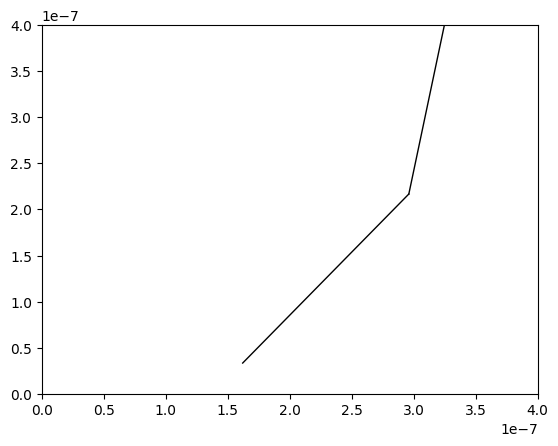

In [8]:
f  = Fiber(400e-9, 10, 200e-9)
f.update(1e-6)
fig, ax = plt.subplots()
f.display(ax)
plt.show()

array([65.27328972, 48.61551447])